In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datasist as ds
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10,10)},font_scale=1.2)
sns.set_palette('viridis')

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [5]:
for col in df.columns:
    print(f'For column {col}')
    print(f'{df[col].value_counts()}')
    print("***********************************************")

For column User ID
15709183    1
15589715    1
15779581    1
15611191    1
15724858    1
           ..
15727467    1
15699619    1
15697574    1
15628972    1
15730688    1
Name: User ID, Length: 400, dtype: int64
***********************************************
For column Gender
Female    204
Male      196
Name: Gender, dtype: int64
***********************************************
For column Age
35    32
37    20
41    16
42    16
26    16
39    15
40    15
47    14
48    14
38    13
27    13
28    12
46    12
36    12
31    11
30    11
29    10
49    10
32     9
33     9
24     9
20     7
19     7
60     7
59     7
45     7
25     6
34     6
58     6
52     6
23     6
57     5
22     5
18     5
53     5
21     4
50     4
54     4
55     3
43     3
56     3
51     3
44     2
Name: Age, dtype: int64
***********************************************
For column EstimatedSalary
72000     12
80000     11
79000     10
71000      9
75000      9
          ..
142000     1
100000     1
37000      1

In [6]:
gender = {'Male':1,'Female':0}

In [7]:
df['Gender'] = df['Gender'].map(gender)

In [8]:
df.rename(columns={'Gender':'Male'},inplace=True)

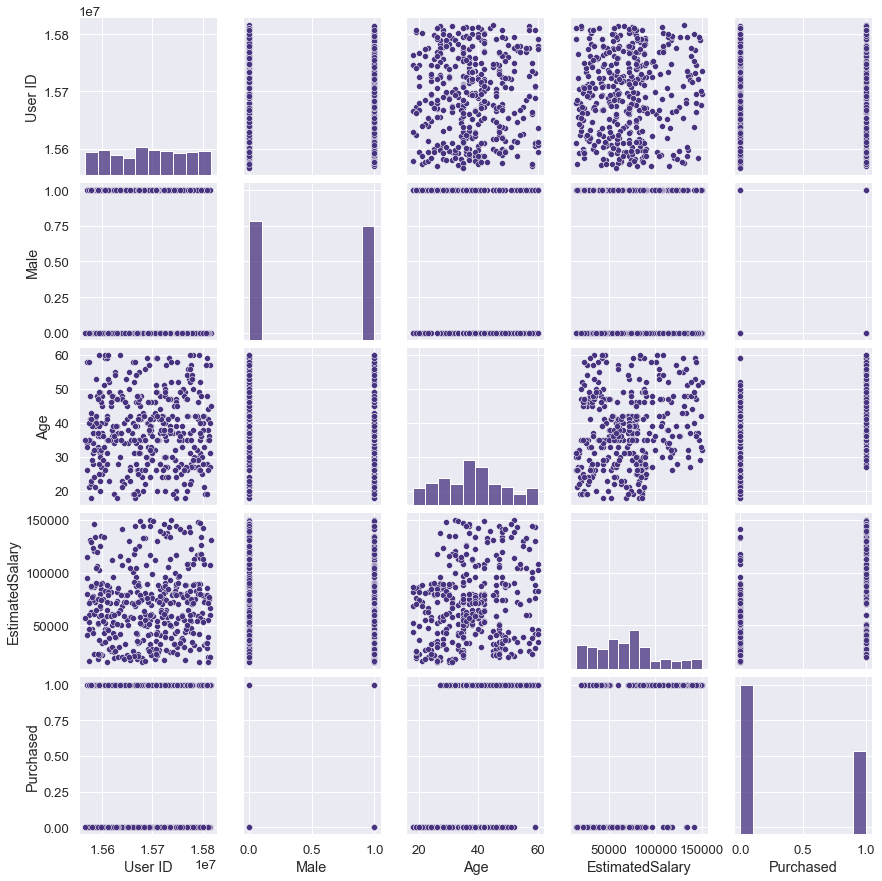

In [9]:
sns.pairplot(df)

In [10]:
df.drop('User ID',axis=1,inplace=True)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

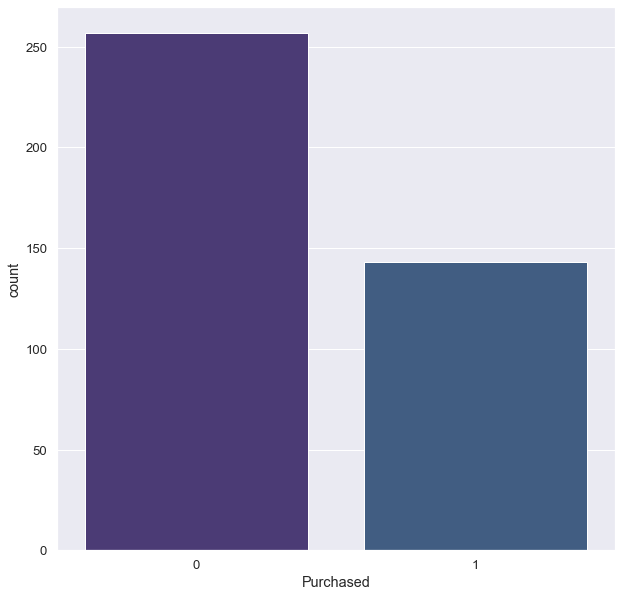

In [11]:
sns.countplot(df['Purchased'])

<AxesSubplot:xlabel='Male', ylabel='count'>

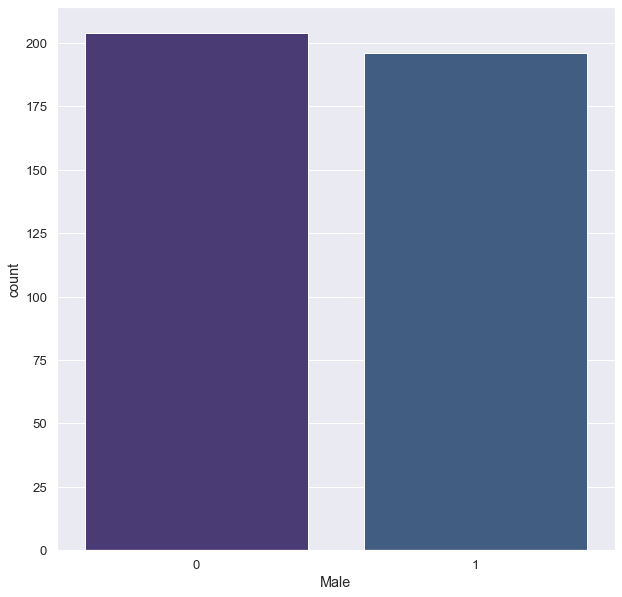

In [12]:
sns.countplot(df['Male'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

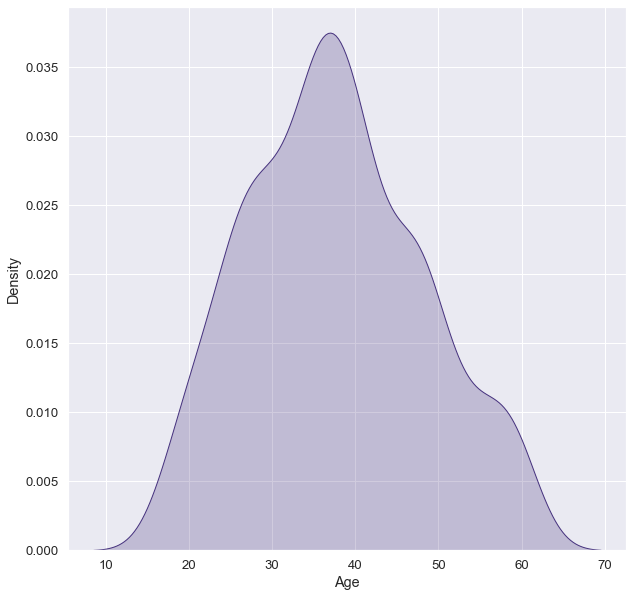

In [13]:
sns.kdeplot(df['Age'],shade=True)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

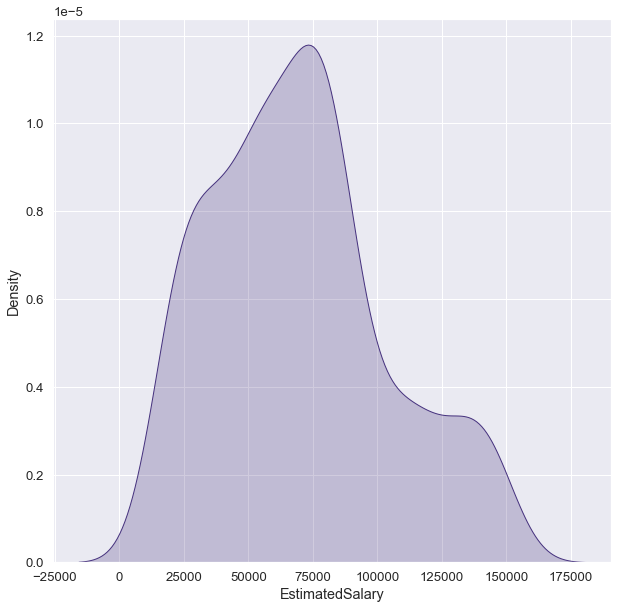

In [14]:
sns.kdeplot(df['EstimatedSalary'],shade=True)

<AxesSubplot:xlabel='EstimatedSalary'>

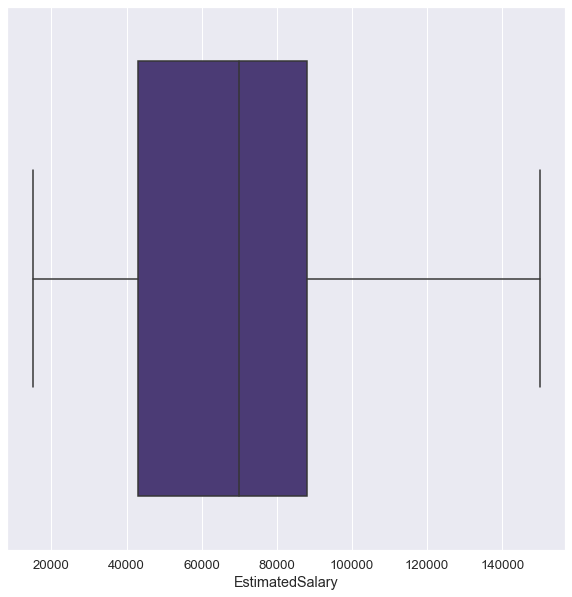

In [15]:
sns.boxplot(df['EstimatedSalary'])

<AxesSubplot:xlabel='Age'>

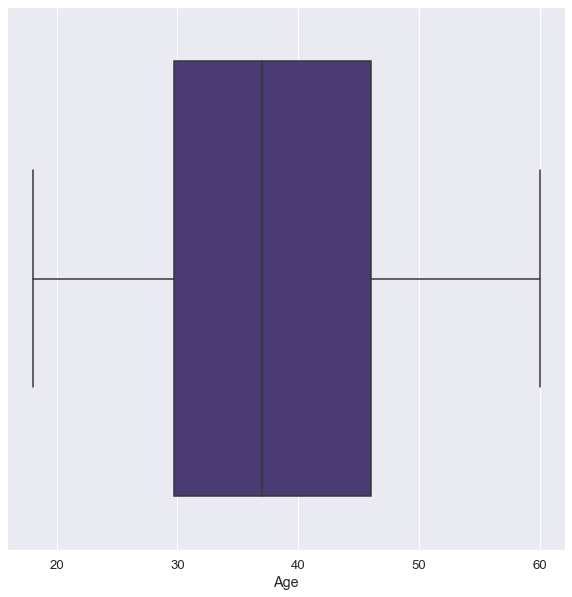

In [16]:
sns.boxplot(df['Age'])

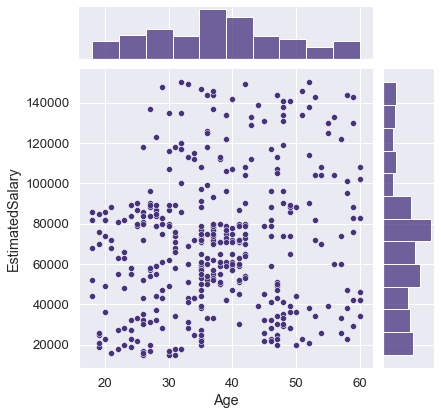

In [17]:
sns.jointplot(df['Age'],df['EstimatedSalary'])

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

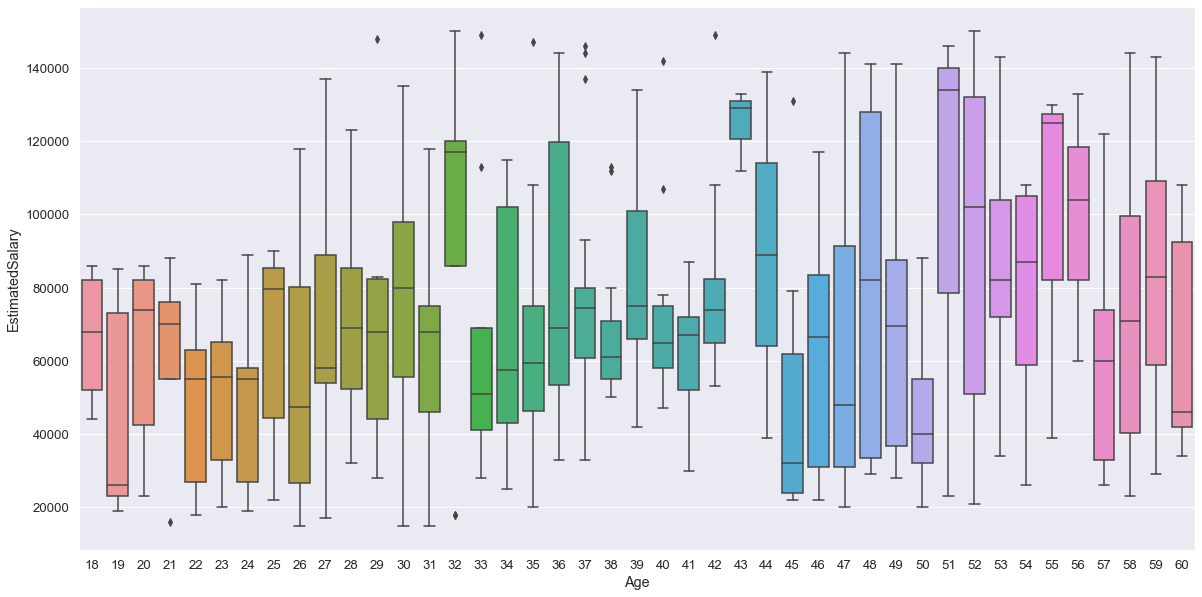

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['Age'],y=df['EstimatedSalary'])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
x = df.drop('Purchased',axis=1)
y = df['Purchased']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42,test_size = 0.2)

In [22]:
models = [LogisticRegression(),MLPClassifier(),SVC(),RandomForestClassifier(),DecisionTreeClassifier()]

In [23]:
for model in models:
    print(f'For model {model}')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f'Accuracy score = {accuracy_score(y_pred,y_test)}')
    print(f'Confusin Matrix\n{classification_report(y_test,y_pred)}')
    print(f'Classification report\n{classification_report(y_test,y_pred)}')

For model LogisticRegression()
Accuracy score = 0.65
Confusin Matrix
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80

Classification report
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80

For model MLPClassifier()
Accuracy score = 0.65
Confusin Matrix
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy               